#### Danh sách thành viên:
    521H0395 - Đỗ Hoàng Duy
    520H0509 - Đào Tường Lâm Quyền Anh
    521H0477 - Trần Lê Thái Sơn

### Tổng quan về dữ liệu
        Dữ liệu trên giải quyết bài toán về dự đoán một khách hàng sẽ rời bỏ ngân hàng 
    hay không, dữ liệu được lấy từ ngân hàng quốc tế ABC (Arabian Banking Corporation)
### Chi tiết về các đặc trưng
#### Dữ liệu gồm 12 cột tất cả
        customer_id: id của khách hàng, dữ liệu này không cần thiết.
        credit_score: điểm tín dụng của khách hàng, kiểu dữ liệu numerical.
        country: đất nước sinh sống của khách hàng, kiểu dữ liệu categorical.
        gender: giới tính khách hàng, kiểu dữ liệu categorical.
        age: tuổi khách hàng, kiểu dữ liệu numerical.
        tenure: số năm kể từ lúc khách hàng đó sở hữu tài khoản ngân hàng ABC,
    kiểu dữ liệu numerical.
        balance: số dư tài khoản của khách hàng, kiểu dữ liệu numerical.
        products_number: số sản phẩm sử dụng ở ngân hàng, kiểu dữ liệu numerical.
        credit_card: khách hàng này có thẻ tín dụng hay không, kiểu dữ liệu categorical.
        active_member: khách hàng này có là thành viên của ngân hàng hay không,
    kiểu dữ liệu categorical.
        estimated_salary: mức lương có được của khách hàng đó, kiểu dữ liệu numerical.
    churn: khách hàng đó có rời bỏ ngân hàng hay không, kết quả.

In [101]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import Ridge, Lasso


In [102]:
filename = "dataset.csv"
df = pd.read_csv(filename)
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
#In ra label của các cột đặc trưng
print(df.columns.tolist())

['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [104]:
#In ra kiểu dữ liệu của từng cột
print(df.dtypes)

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


In [105]:
#Sử dụng Label Encoding để biến đổi dữ liệu categorical (3)
labelEncoder = LabelEncoder()
types = df.dtypes
label = df.columns.tolist()

for i in range(len(df.dtypes)):
    if (types[i] == 'object'):
        df[label[i]] = labelEncoder.fit_transform(df[label[i]])

df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


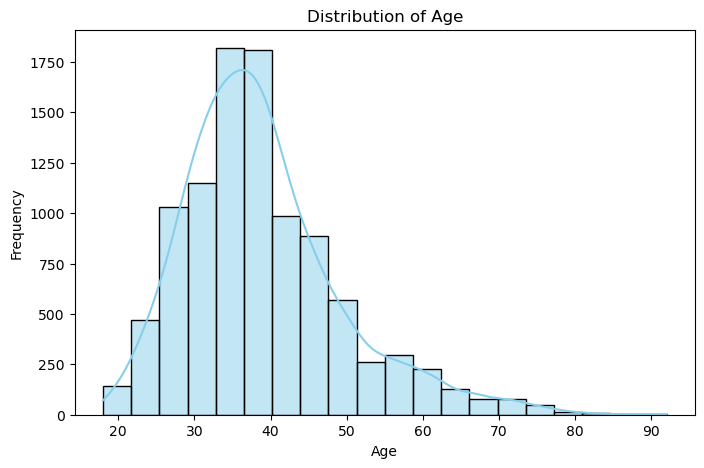

In [106]:
#Trực quan hóa đặc trưng tuổi khách hàng
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

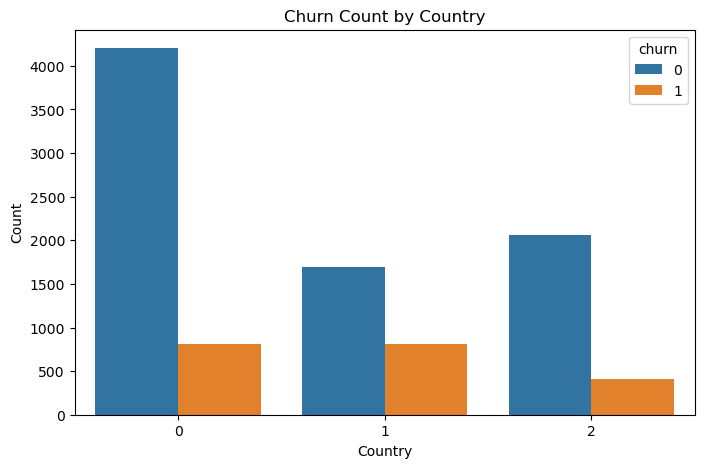

In [107]:
#Trực quan hóa lượng rời bỏ theo đất nước của khách hàng
plt.figure(figsize=(8, 5))
sns.countplot(x='country', hue='churn', data=df)
plt.title('Churn Count by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

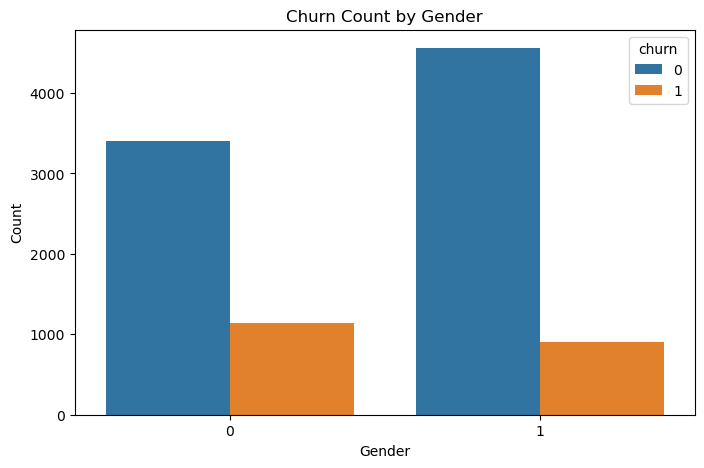

In [108]:
#Trực quan hóa lượng rời bỏ theo giới tính của khách hàng
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

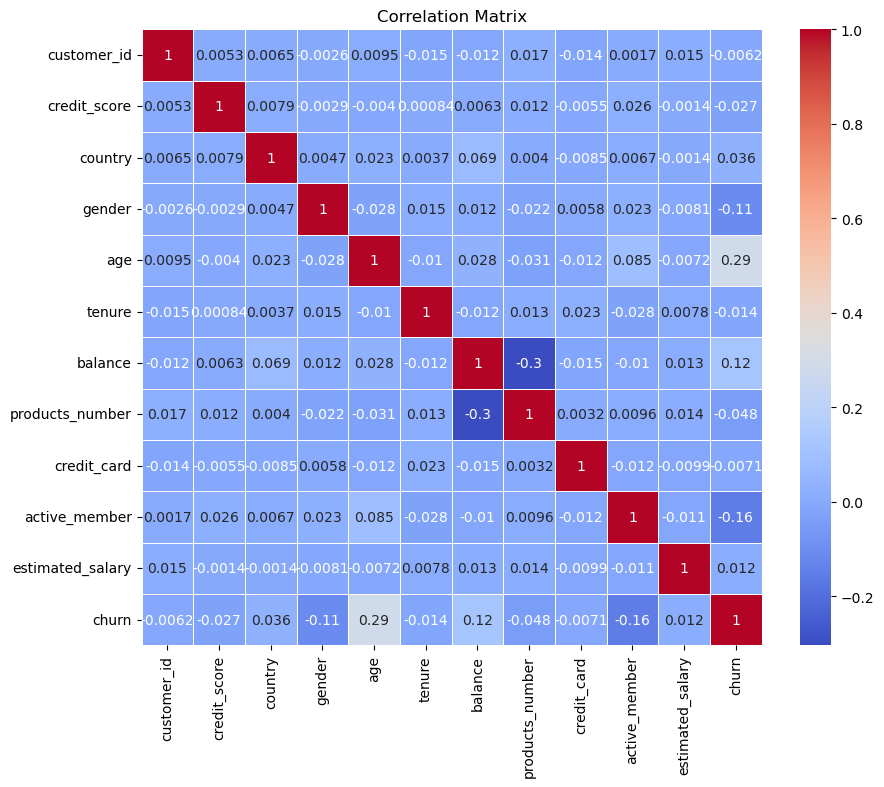

In [109]:
#Trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [110]:
#Chia dataset thành 2 mảng dữ liệu và kết quả
X = df.drop(["churn", "customer_id"], axis = 1).values
Y = df["churn"].values

print(X.shape)
print(Y.shape)

(10000, 10)
(10000,)


In [111]:
#Chuẩn hóa các đặc trưng dữ liệu 
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.538      0.         0.         0.32432432 0.2        0.
 0.         1.         1.         0.50673489]


In [112]:
#Chia dataset sau khi xử lý thành tập dữ liệu huấn luyện và test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y)

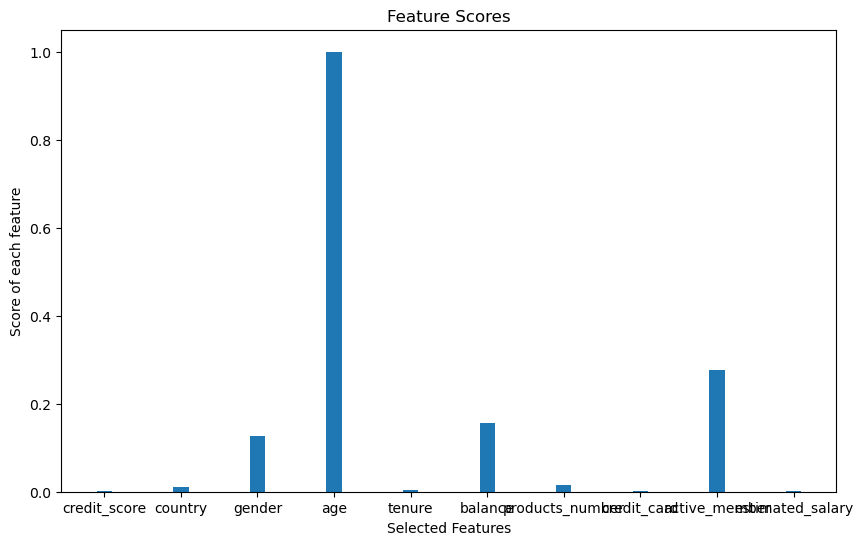

Selected Features: Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')


In [113]:
#Đánh gía vai trò của các đặc trưng
selector = SelectKBest(f_classif, k=10)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

selected_feature_indices = selector.get_support(indices=True)
selected_features = df.drop(["churn", "customer_id"], axis = 1).columns[selected_feature_indices]

selected_scores = selector.scores_[selected_feature_indices]
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.bar(selected_features, selected_scores / selected_scores.max(), width=0.2)
plt.xlabel("Selected Features")
plt.ylabel("Score of each feature")
plt.title("Feature Scores")
plt.show()

print("Selected Features:", selected_features)


### Các biện pháp tránh Overfitting:
#### 1.Regularization:
    L1 Regularization (Lasso): Thêm thông số phạt vào loss function sao cho tỷ lệ thuận với giá trị tuyệt đối của hệ số của mô hình. Điều này sẽ loại bỏ các tính năng ít quan trọng.
    L2 Regularization (Ridge): Thêm thông số phạt tỷ lệ với giá trị bình phương của hệ số của mô hình. Điều này thu nhỏ hệ số về phía không mà không loại bỏ chúng hoàn toàn.
    
#### 2. Phân tích chéo:
    Phân tích chéo K-Fold: Chia tập huấn luyện thành k phần, sau đó huấn luyện mô hình trên k-1 phần và đánh giá trên phần còn lại. Quá trình này được lặp lại k lần và hiệu suất trung bình được sử dụng để đánh giá khả năng tổng quát của mô hình.

#### 3. Tăng cường dữ liệu:
    Tăng cường hình ảnh: Tạo ra dữ liệu huấn luyện mới một cách nhân tạo bằng cách áp dụng các biến đổi cho các hình ảnh hiện có (ví dụ: lật, xoay, thu phóng, cắt xén).
    Tạo dữ liệu tổng hợp: Tạo các điểm dữ liệu mới bằng cách sử dụng các kỹ thuật như SMOTE cho tập dữ liệu mất cân bằng.
    
#### 4. Dropout: 
    Ngẫu nhiên bỏ qua một tỷ lệ node Neural với mỗi vòng lặp huấn luyện, ngăn chặn sự thích ứng của các node Neural và cải thiện khả năng tổng quát.

#### 5. Chọn tính năng:
    Loại bỏ các tính năng không liên quan hoặc trùng lặp để giảm độ phức tạp của mô hình và nguy cơ quá khớp.


In [114]:
#L1 Regularization
#(2)
lasso = Lasso(alpha=0.1)  #(1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [115]:
#L2 Regularization (Ridge)
#(2)
ridge = Ridge(alpha=1.0)  #(1)
ridge.fit(X_train, y_train)

Ridge()

In [116]:
# Tạo mô hình Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_logreg = logreg_model.predict(X_test)

# Đánh giá mô hình
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy (Logistic Regression): {accuracy_logreg}')
print(classification_report(y_test, y_pred_logreg))

Accuracy (Logistic Regression): 0.8028
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1983
           1       0.59      0.15      0.25       517

    accuracy                           0.80      2500
   macro avg       0.70      0.56      0.57      2500
weighted avg       0.77      0.80      0.75      2500



In [117]:
# Tạo mô hình Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_tree = tree_model.predict(X_test)

# Đánh giá mô hình
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy (Decision Tree): {accuracy_tree}')
print(classification_report(y_test, y_pred_tree))

Accuracy (Decision Tree): 0.784
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1983
           1       0.48      0.49      0.48       517

    accuracy                           0.78      2500
   macro avg       0.67      0.68      0.67      2500
weighted avg       0.79      0.78      0.79      2500



In [118]:
# Tạo mô hình Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.8556
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1983
           1       0.76      0.44      0.56       517

    accuracy                           0.86      2500
   macro avg       0.82      0.70      0.74      2500
weighted avg       0.85      0.86      0.84      2500



In [119]:
# Tạo mô hình XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_xgb = xgb_model.predict(X_test)

# Đánh giá mô hình
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy (XGBoost): {accuracy_xgb}')
print(classification_report(y_test, y_pred_xgb))

Accuracy (XGBoost): 0.8508
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1983
           1       0.69      0.50      0.58       517

    accuracy                           0.85      2500
   macro avg       0.78      0.72      0.75      2500
weighted avg       0.84      0.85      0.84      2500



In [120]:
#Xây dựng và huấn luyện mô hình Feed Forward Neural Network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
#Dropout một số node Neural để tránh Overfitting
model.add(keras.layers.Dropout(0.4))  #(1)
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #(4)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  #(1)

#Đánh giá mô hình Feed Forward Neural Network
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report_str}")

Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 0.5022 - accuracy: 0.7955 - val_loss: 0.4900 - val_accuracy: 0.7820
Epoch 2/10
188/188 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.8043 - val_loss: 0.4659 - val_accuracy: 0.7987
Epoch 3/10
188/188 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8113 - val_loss: 0.4551 - val_accuracy: 0.8100
Epoch 4/10
188/188 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8163 - val_loss: 0.4571 - val_accuracy: 0.8033
Epoch 5/10
188/188 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8193 - val_loss: 0.4373 - val_accuracy: 0.8140
Epoch 6/10
188/188 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8258 - val_loss: 0.4217 - val_accuracy: 0.8253
Epoch 7/10
188/188 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8317 - val_loss: 0.4116 - val_accuracy: 0.8267
Epoch 

In [121]:
#Xây dựng và huấn luyện mô hình Recurrent Neural Network
model = keras.models.Sequential() 

model.add(keras.layers.SimpleRNN(64, return_sequences=True, input_shape = (X_train.shape[1], 1))) 
model.add(keras.layers.SimpleRNN(64)) 
model.add(keras.layers.Dense(128, activation="relu"))
#Dropout một số node Neural để tránh Overfitting
model.add(keras.layers.Dropout(0.4))  #(1)
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #(4)
model.fit(X_train, y_train, epochs=10)  #(1)

#Đánh giá độ sai mô hình Feed Forward Neural Network
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report_str}")

error = 0
for i in range(len(y_pred.T[0])):
     if (y_pred.T[0][i] != y_test.T[i]):
         error += 1
        
print("Number of fault: " + str(error))

Epoch 1/10
235/235 [==============================] - 3s 3ms/step - loss: 0.4704 - accuracy: 0.7985
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4353 - accuracy: 0.8140
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8315
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3767 - accuracy: 0.8431
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3745 - accuracy: 0.8443
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3709 - accuracy: 0.8451
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3652 - accuracy: 0.8472
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8491
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3595 - accuracy: 0.8532
Epoch 10/10
79/79 [==============================] - 0s 1ms/step
Accuracy: 0.8544
Confusion Matrix:


### Một số chiến lược có thể thực hiện để cải thiện độ chính xác sau khi mô hình đã được huấn luyện:

#### 1.Tinh chỉnh Hyperparameters: (1)
    Learning Rate: Thay đổi tỷ lệ học (learning rate) để kiểm tra 
    xem giá trị nào tối ưu nhất.
    Số Epochs và Batch Size: Tinh chỉnh số lượng epochs và kích thước batch 
    trong quá trình huấn luyện.
    Kiến Trúc Mô Hình: Thử nghiệm các kiến trúc mô hình khác nhau, 
    thêm hoặc giảm số lớp và đơn vị trong mỗi lớp.

#### 2.Kiểm soát Overfitting: (2)
    Lớp Dropout: Thêm lớp dropout để giảm overfitting.
    Regularization (L1 hoặc L2): Sử dụng regularization để 
    kiểm soát giá trị trọng số.

#### 3.Data Augmentation:
    Tăng cường dữ liệu để tạo thêm biến thể và đảm bảo mô hình học
    được các đặc trưng tổng quát hơn.

#### 4.Optimize Hàm Mất Mát:
    Thử nghiệm các hàm mất mát khác nhau để xem cái nào 
    phù hợp nhất với bài toán của bạn.

#### 5.Kiểm tra và Xử lý Dữ liệu: (3)
    Kiểm tra và xử lý dữ liệu bất thường hoặc thiếu sót.
    Kiểm tra xem có nên thực hiện thêm các bước tiền 
    xử lý dữ liệu không, như loại bỏ outliers, xử lý missing values, 
    hoặc scaling dữ liệu.

#### 6.Optimize Hàm Tối Ưu Hóa: (4)
    Thử nghiệm các thuật toán tối ưu hóa khác nhau, 
    ví dụ: Adam, RMSprop, hoặc SGD.
##### Ghi chú: Các phương pháp trên được thực hiện vào model ở các chỗ đánh dấu